##                          Surendra kumar

##  Car Price Prediction
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



*   Car_ID : Unique id of each observation (Interger)
*   Symboling : Its assigned insurance risk rating, A value of +3 - Indicates that the auto is risky, -3 that it is probably pretty safe.
*   CarCompany : Name of car company (Categorical)
*   Fueltype : Car fuel type i.e gas or diesel (Categorical)
*   Aspiration : Aspiration used in a car (Categorical)
*   Doornumber : Number of doors in a car (Categorical)
*   Carbody : body of car (Categorical)
*   Drivewheel : type of drive wheel (Categorical)
*   Eginelocation : Location of car engine (Categorical)
*   Wheelbase : Weelbase of car (Numeric)
*   Carlength : Length of car (Numeric)
*   Carwidth : Width of car (Numeric)
*   Carheight : height of car (Numeric)
*   Curbweight : The weight of a car without occupants or baggage. (Numeric)
*   Enginetype : Type of engine. (Categorical)
*   Cylindernumber : cylinder placed in the car (Categorical)
*   Enginesize : Size of car (Numeric) 
*   Fuelsystem : Fuel system of car (Categorical)
*   Boreratio : Boreratio of car (Numeric)
*   Stroke : Stroke or volume inside the engine (Numeric)
*   Compressionratio : compression ratio of car (Numeric)
*   Horsepower : Horsepower (Numeric)
*   Peakrpm : car peak rpm (Numeric)
*   Citympg : Mileage in city (Numeric)
*   Highwaympg : Mileage on highway (Numeric)
*   Price(Dependent variable) : Price of car (Numeric)

### Important Libraries 

In [1]:
!pip install colorama

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from colorama import Fore, Back, Style
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Loading the data

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")


## Working with dataset

In [4]:
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [9]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
print(df.CarName.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [11]:
df["price"].describe().round(2)

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

# Droping unnecessary columns/Features

In [12]:
df.drop(columns="car_ID",inplace=True)

In [13]:
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Distribution of our data

C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


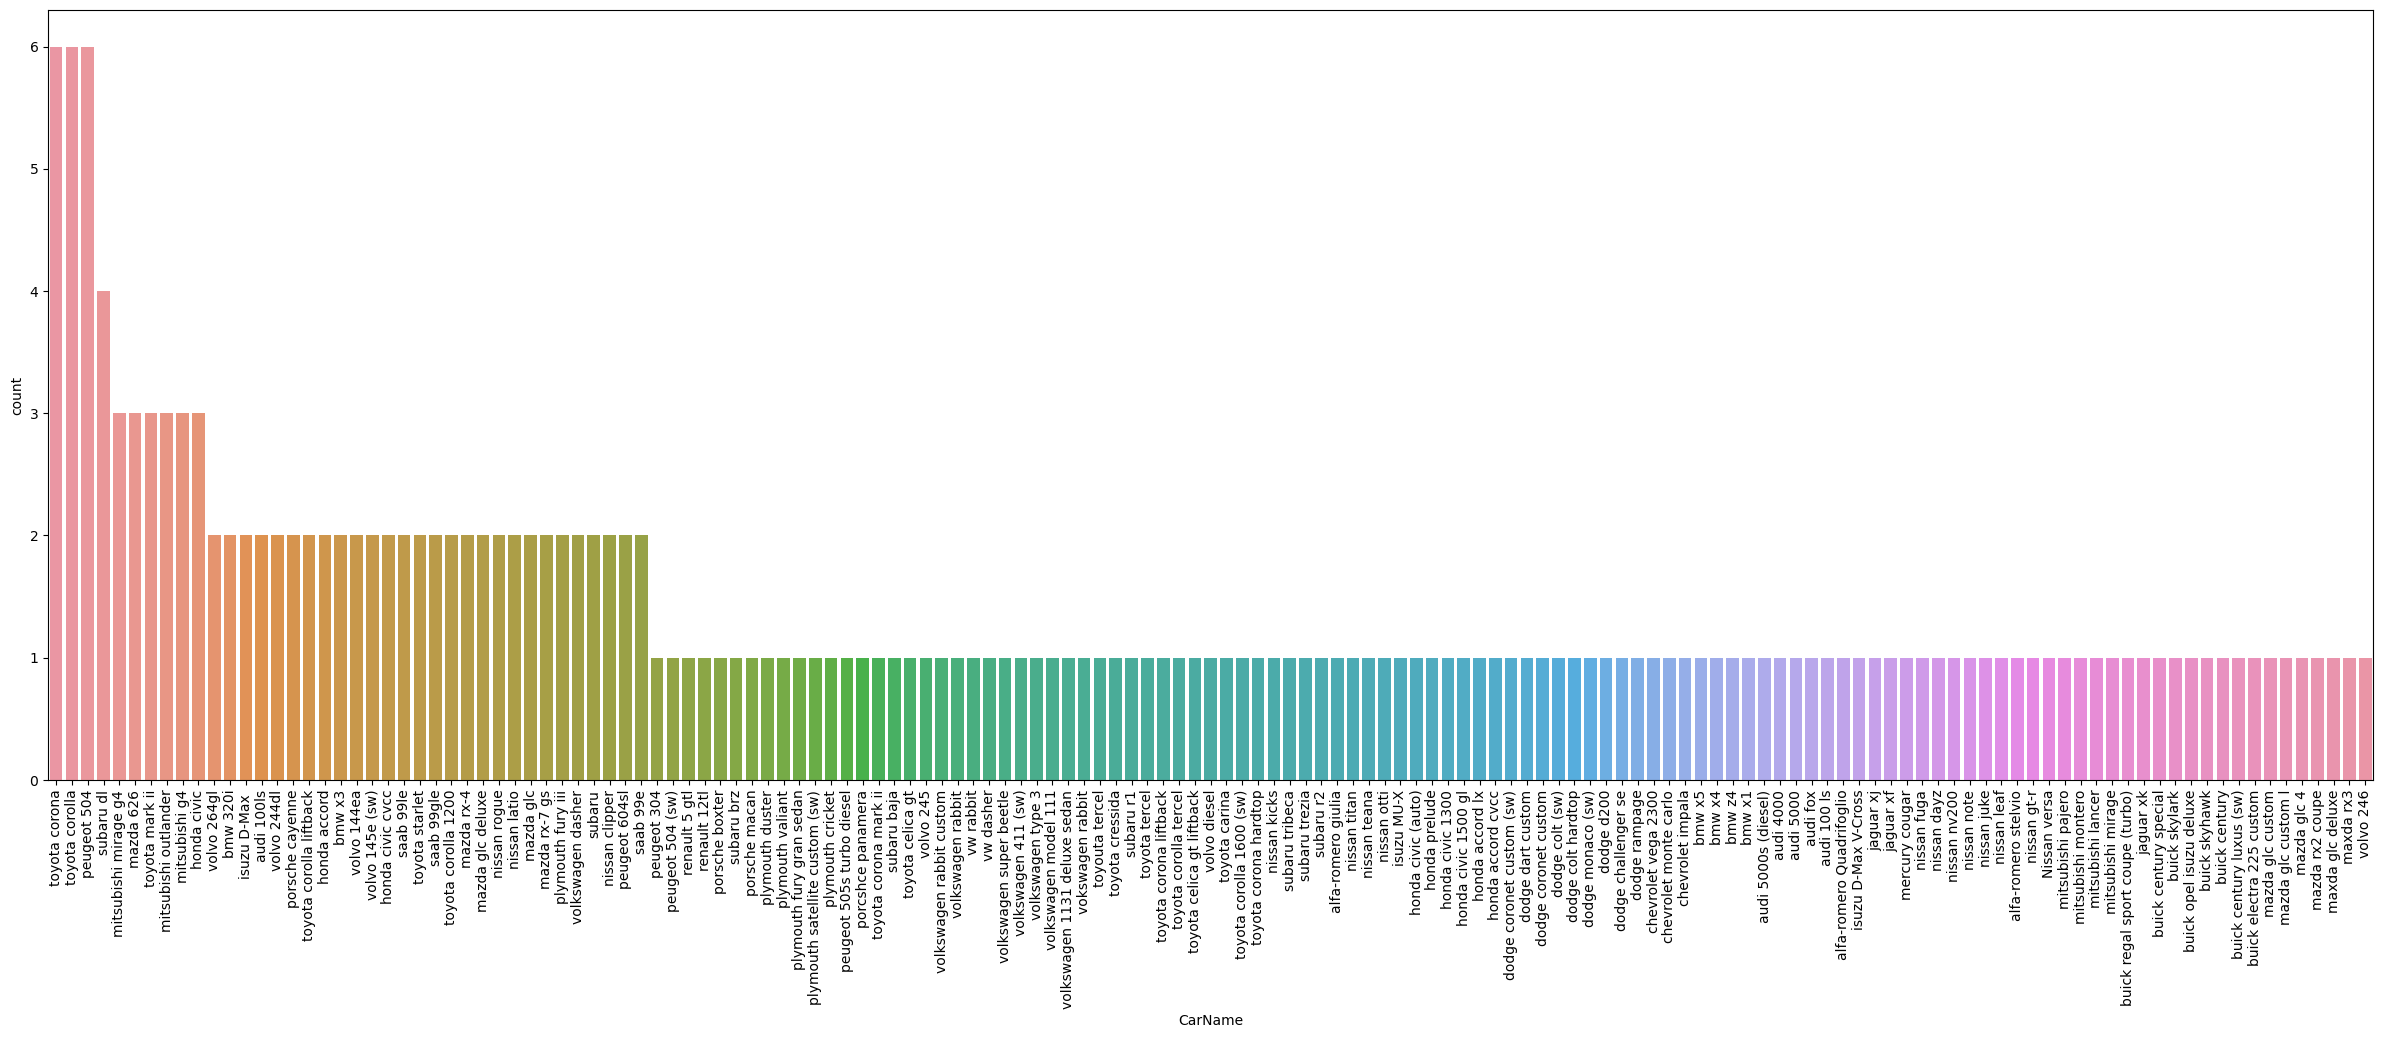

In [14]:
plt.figure(figsize = [30, 10])
sns.countplot(df["CarName"],order = df["CarName"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

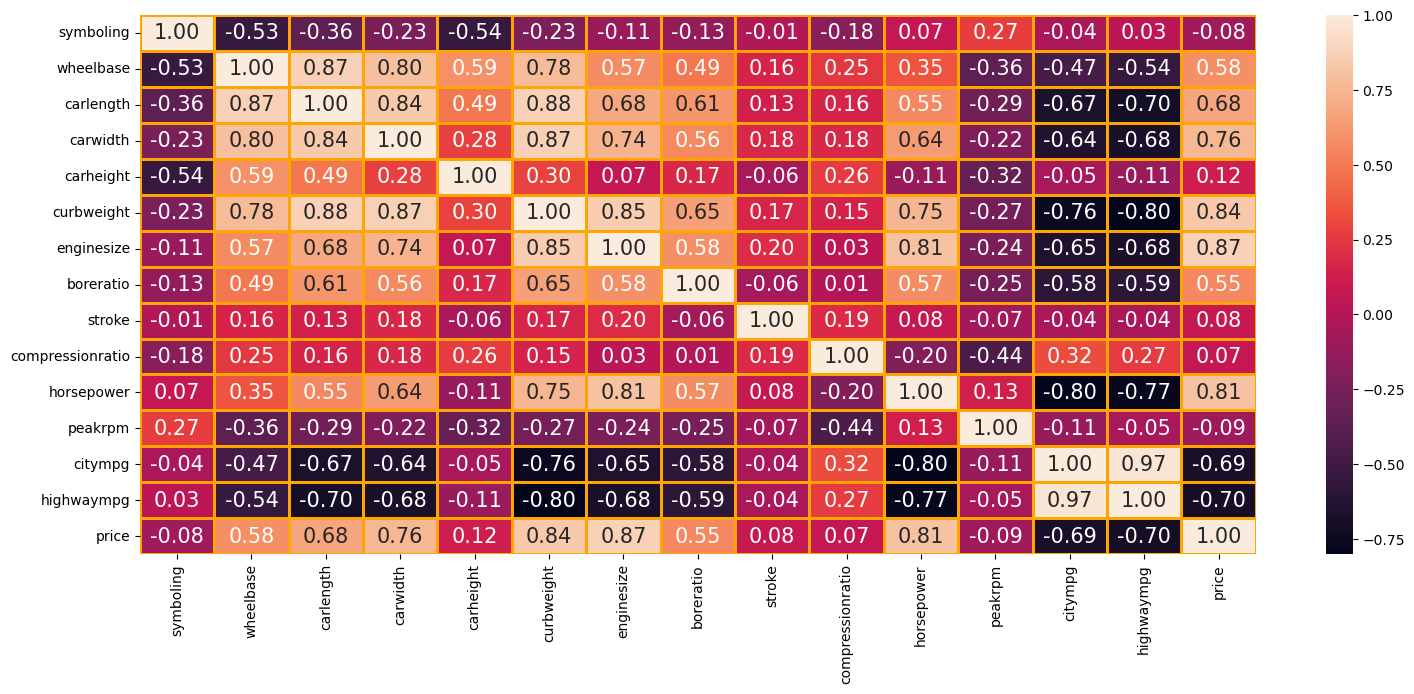

In [15]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

Text(0.5, 1.0, "No. of Car's according to fuel type")

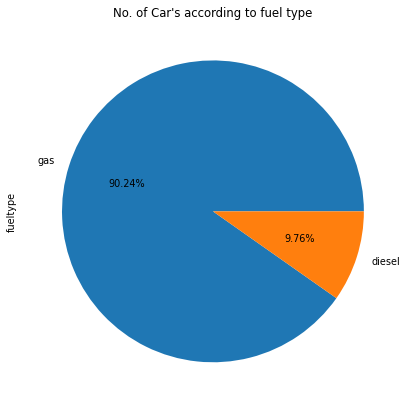

In [16]:
plt.figure(figsize = [7, 7],dpi=70)
df["fueltype"].value_counts().plot.pie( autopct='%1.2f%%');
plt.title("No. of Car's according to fuel type")

## Car price according to fuel type

In [17]:
Fuel_price = df.groupby("fueltype")["price"].mean()
Fuel_price

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<AxesSubplot:xlabel='fueltype'>

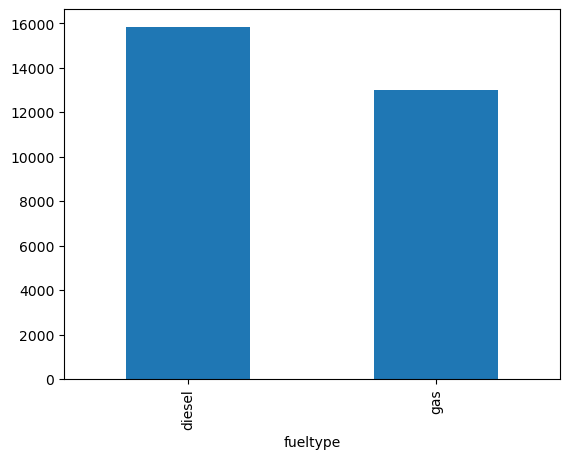

In [18]:
Fuel_price.plot(kind="bar")

## Car Aspiration in Dataset (Standard or Turbo) 

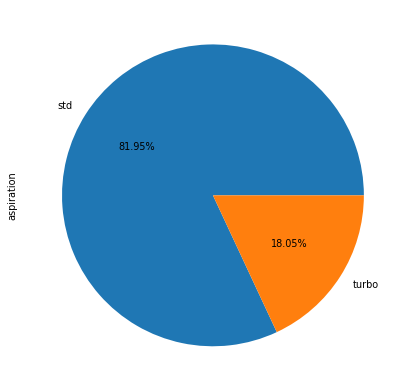

In [19]:
plt.figure(figsize = [7, 7],dpi=70)
df["aspiration"].value_counts().plot.pie( autopct='%1.2f%%');

In [20]:
 # Average price of Standard and Turbo.

SP = df.groupby("aspiration")["price"].mean()
SP

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<AxesSubplot:xlabel='aspiration'>

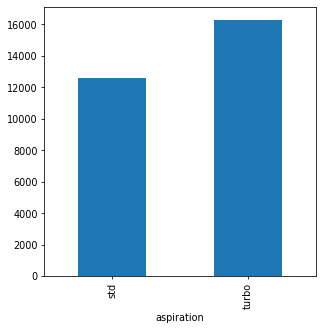

In [21]:
plt.figure(figsize = [5, 5],dpi=70)
SP.plot(kind='bar')

<Figure size 800x500 with 0 Axes>

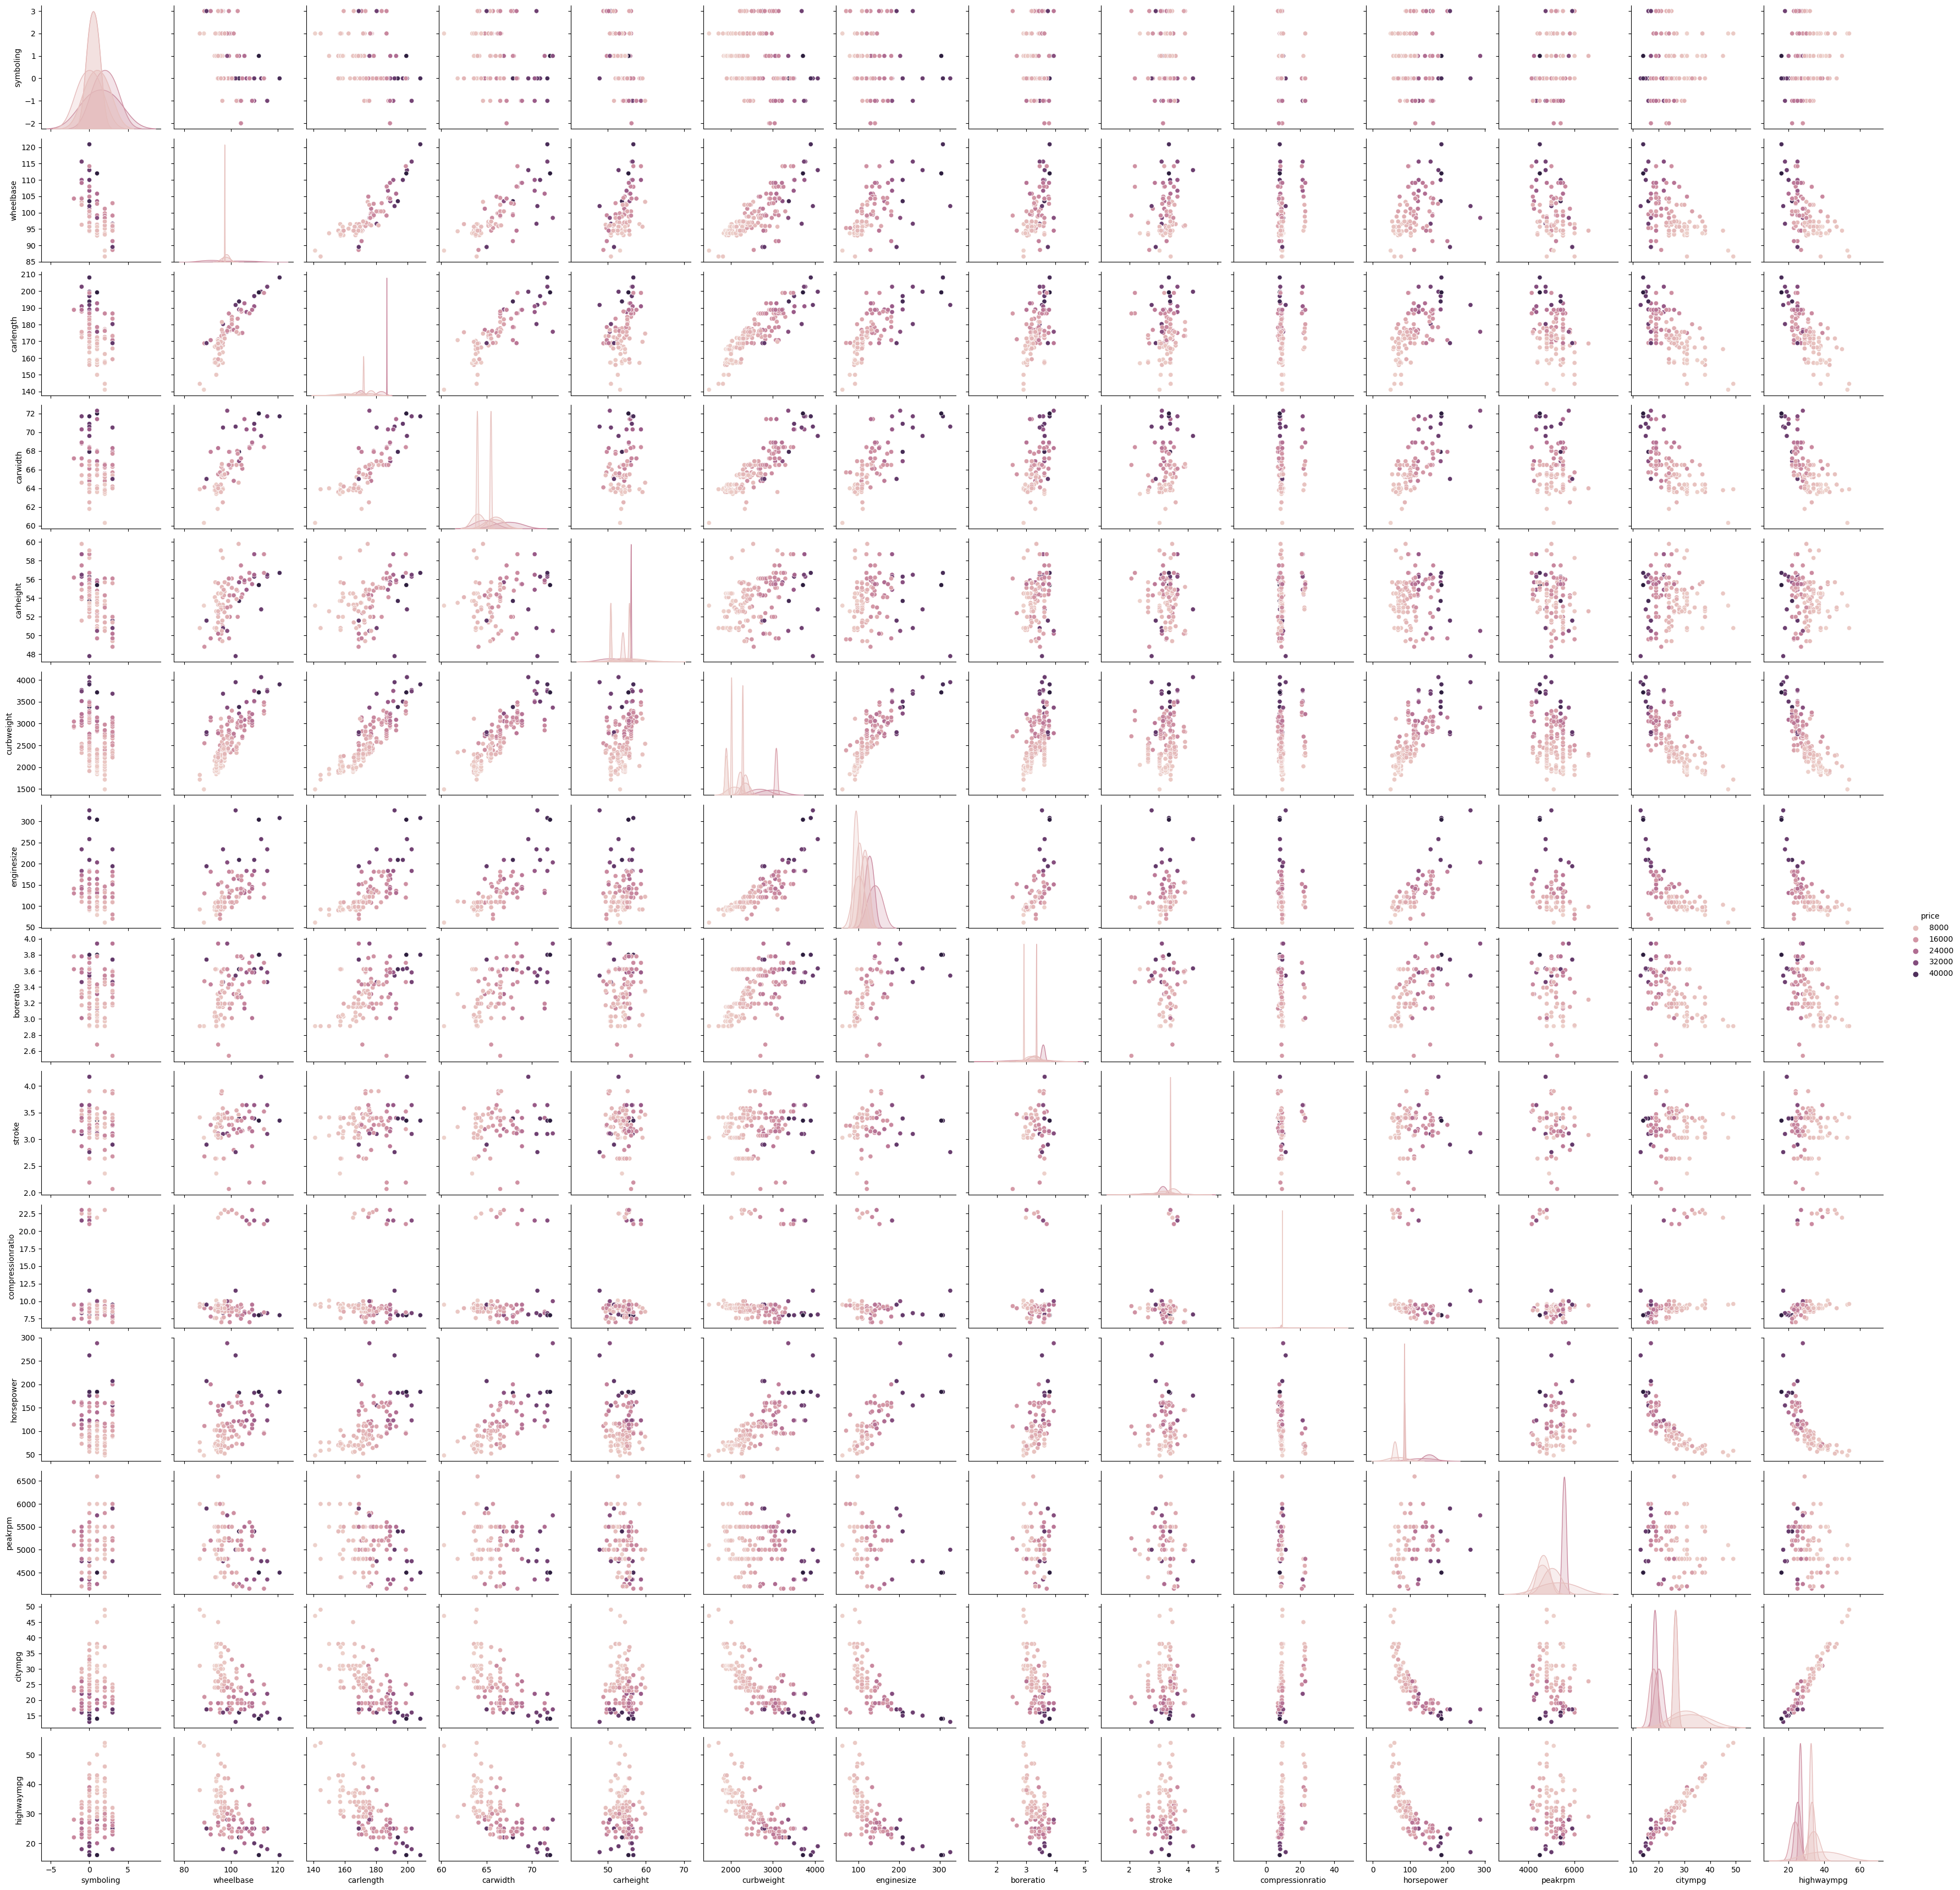

In [22]:
# Pair plot for all features 
plt.figure(figsize=(8,5),dpi=100)
sns.pairplot(df,hue='price')

C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


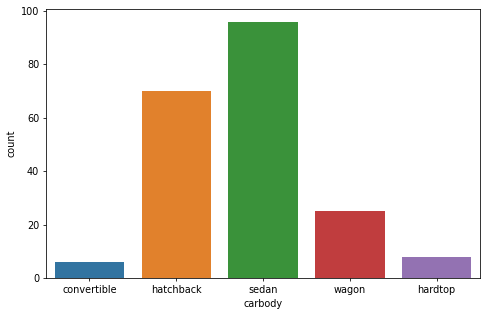

In [23]:
# Which is most Car Body repeats in the Dataset
plt.figure(figsize = [8, 5],dpi=70)
sns.countplot(df["carbody"]);

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64


<AxesSubplot:xlabel='carbody'>

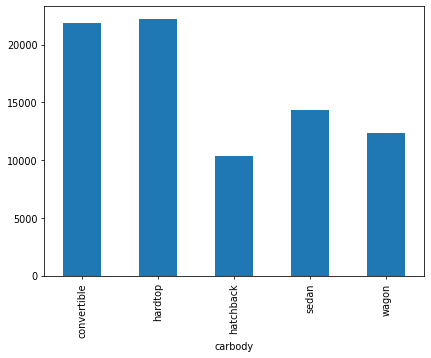

In [24]:
pb= df.groupby("carbody")["price"].mean()
print(pb)
plt.figure(figsize = [7, 5],dpi=70)
pb.plot(kind='bar')

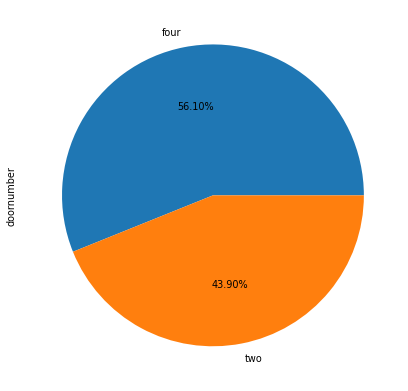

In [25]:
# Which is most Door Number repeats in the Dataset [2 or 4]
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff",dpi=70)
df["doornumber"].value_counts().plot.pie( autopct='%1.2f%%');

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64


<AxesSubplot:xlabel='doornumber'>

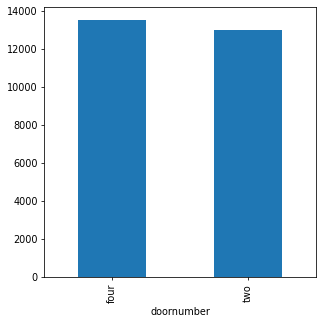

In [26]:
dp= df.groupby("doornumber")["price"].mean()
print(dp)
plt.figure(figsize = [5, 5],dpi=70)
dp.plot(kind='bar')

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64


<AxesSubplot:xlabel='drivewheel'>

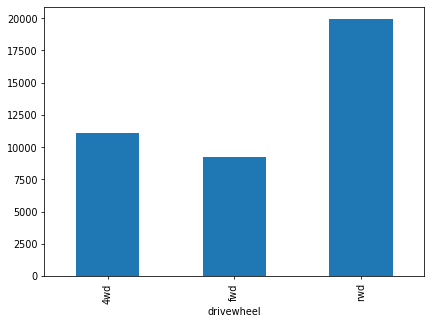

In [27]:
# the average price depend on the Drive Wheel

DwP = df.groupby("drivewheel")["price"].mean()
print(DwP)
plt.figure(figsize = [7, 5],dpi=70)
DwP.plot(kind='bar')

Most People are using fwd drive wheel because the price is low

## Engine Type

C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


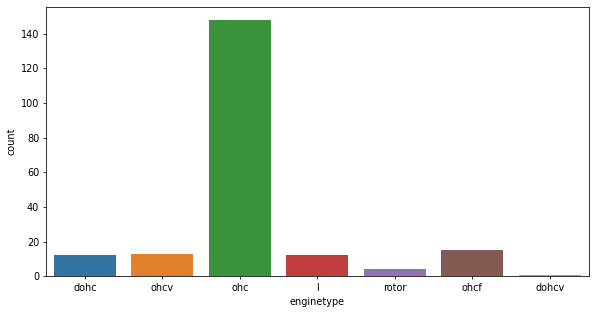

In [28]:
plt.figure(figsize = [10, 5],dpi=70)
sns.countplot(df["enginetype"])
plt.show()

enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11574.048426
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64


<AxesSubplot:xlabel='enginetype'>

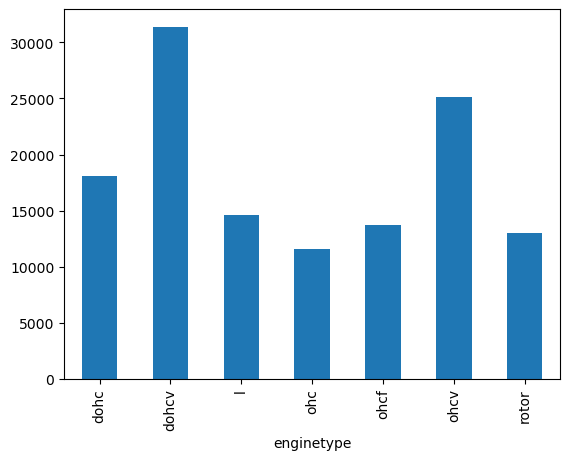

In [29]:
EP=df.groupby("enginetype")["price"].mean()
print(EP)
EP.plot(kind='bar')

## Car price according to Cylinder Number

C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

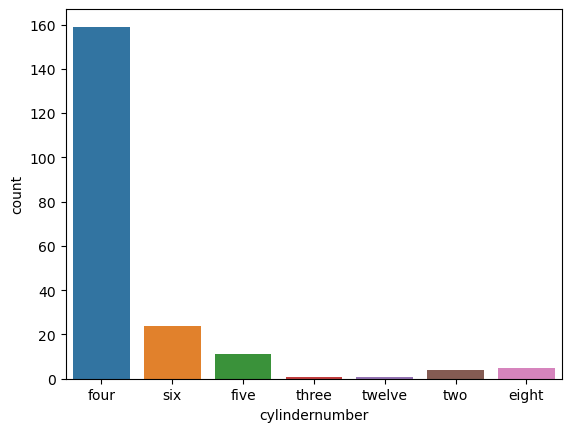

In [30]:
sns.countplot(df["cylindernumber"])

cylindernumber
three      5151.000000
four      10285.754717
two       13020.000000
five      21630.469727
six       23671.833333
twelve    36000.000000
eight     37400.100000
Name: price, dtype: float64


<AxesSubplot:xlabel='cylindernumber'>

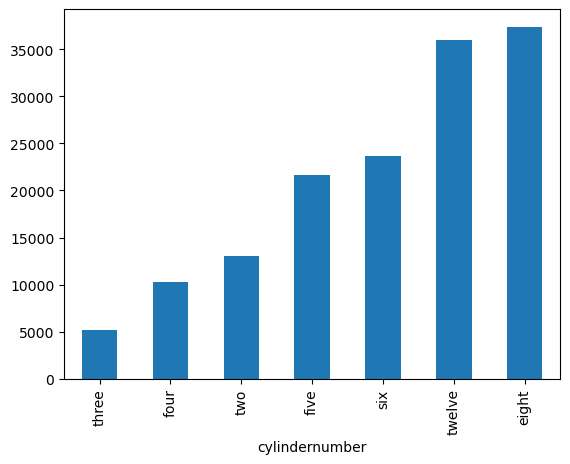

In [31]:
CNP=df.groupby("cylindernumber")["price"].mean()
CNP=CNP.sort_values()
print(CNP)
CNP.plot(kind='bar')

.


## Relation between engine size and price 

Text(0, 0.5, 'The Price')

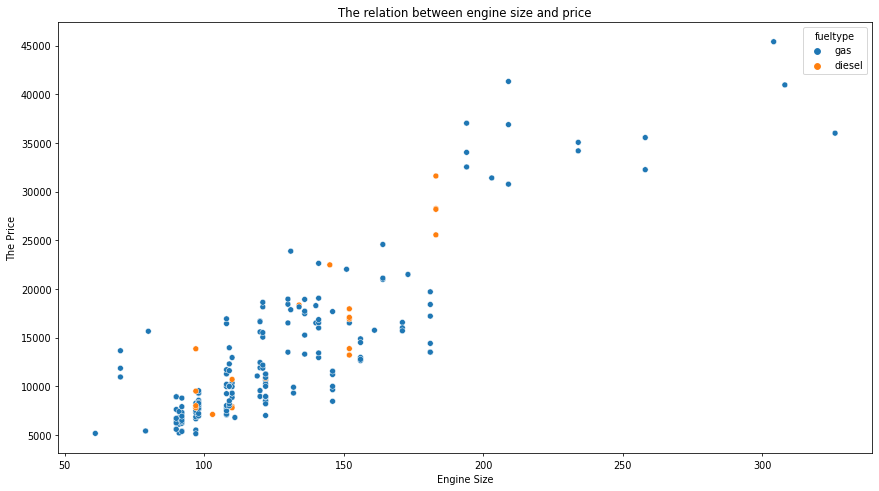

In [32]:
plt.figure(figsize=(15,8),dpi=70)
sns.scatterplot(data=df,x="enginesize",y="price",hue="fueltype",markers=True)
plt.title("The relation between engine size and price")
plt.xlabel("Engine Size")
plt.ylabel("The Price")

.

# Converting Species into numerical data

In [33]:
new_df=df.copy()

In [34]:
obj = []
num = []
for i in new_df.columns:
    if new_df[i].dtypes == 'O':
        obj.append(i)
    else:
        num.append(i)

data_n=new_df[num]   # new dataframe just type numeric
data_c=new_df[obj]  # new dataframe just type object

In [35]:
colm=data_c.columns
colm

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [36]:
label_encoders = {}
categorical_columns = data_c.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])
data_c

C:\Users\Surendra\AppData\Local\Temp\ipykernel_9112\3903201233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = label_encoders[column].fit_transform(data_c[column])


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5
201,138,1,1,0,3,2,0,3,2,5
202,140,1,0,0,3,2,0,5,3,5
203,142,0,1,0,3,2,0,3,3,3


In [37]:
# merge 2 data set 
frames = [data_c, data_n]
  
data1 = pd.concat(frames,axis=1)
data1.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int32  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   enginetype        205 non-null    int32  
 8   cylindernumber    205 non-null    int32  
 9   fuelsystem        205 non-null    int32  
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [39]:
data1.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [40]:
# Here i am choosing thsese columns because these columns has high correlation with the price

data1=data1[["highwaympg","citympg","CarName",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower','curbweight','enginesize','price']]

data1.head()

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,4,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [41]:
data1.shape

(205, 14)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
X = data1.drop(columns="price")           
Y= data1["price"]    # Y = price

# split the data train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


# Different Ml algorithms
Here in this project we are using four ml algorithms which are following:


1.   Linear Regression.
2.   K-Nearest Neighbors Regressor(KNNR).
3.   Support Vector Regressor(SVR).
4.   Random Forest Regressor(RFR).


At the last we are using the only one algorithm which have highest accuracy for evaluating the result of our model. 


In [44]:
from sklearn.metrics import accuracy_score,r2_score,classification_report

scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test)

### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
accuracy_list = []

In [47]:
linear_model = LinearRegression()
linear_model.fit(scaled_x_train, Y_train)

LinearRegression()

In [48]:
linear_model.coef_

array([-652.43183491,  401.05650656, -978.28666859, 2165.38170338,
        111.24725216, -275.5101644 ,  306.0001121 ,  546.74994697,
       -320.24219491, 2058.9936216 , 1106.38339672, 1500.98932711,
       2329.95066108])

In [49]:
y_pred= linear_model.predict(scaled_x_test)
y_pred

array([24779.91556136, 18920.85455098, 10144.6392654 , 12308.66823676,
       26705.30305025,  6243.48960781,  6421.16081116,  6136.33724519,
        9350.61214366,  6504.93127248, 13641.96116056,  6986.32331913,
       15766.99767625, 11385.1877031 , 37619.76197597,  4782.73640667,
        -158.90870134, 16838.42557033, 10778.50725253,  9169.60072444,
       12042.13326204, 19514.0149849 ,  6395.46519963,  5445.80068791,
        7034.53822352, 26035.28337523, 13470.92371938, 15535.35198206,
        6052.90549171, 15154.36450328, 25969.68051208,  5472.87618509,
        4634.20263812, 20063.59811973,  8605.62367432, 25903.69192871,
        9212.43708551, 10282.32960683,  6220.73330807, 17148.07230565,
        8436.34738959, 13843.36658988, 17077.90403486,  5250.55973275,
        6037.00762664, 10492.53891904,  6851.29222906,  6239.09865698,
       18653.94468099, 17522.66396189,  6617.33334824, 20112.90856575])

# Evaluation of linear regression model

In [50]:
linear_reg_acc = r2_score(Y_test,y_pred)
accuracy_list.append(100*linear_reg_acc)

In [51]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* linear_reg_acc))

Accuracy of Logistic Regression is :  84.24%


## K-Nearest Neighbors Regressor(KNNR)

In [52]:
from sklearn.neighbors import  KNeighborsRegressor

In [53]:
test_error_rates=[]
for k in range(1,30):
    knn_model= KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(scaled_x_train,Y_train)
    y_knn_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-r2_score(Y_test,y_knn_pred_test)
    test_error_rates.append(test_error);

In [54]:
test_error_rates

[0.10450598989413873,
 0.140278541799021,
 0.07481576855923422,
 0.10631245524183197,
 0.12490842062025131,
 0.12548042090715106,
 0.12999018931557904,
 0.15384512005503426,
 0.17166219113216097,
 0.19764721665991336,
 0.1944453180764827,
 0.20440089273842543,
 0.22448489900776747,
 0.23628676360480183,
 0.23767912183918427,
 0.24530186768800077,
 0.2578630486931198,
 0.2668645187150258,
 0.27546229458382254,
 0.2662216927683687,
 0.2550034282710891,
 0.26479561444566224,
 0.27248350115269004,
 0.28278532827379077,
 0.29031909650051624,
 0.2983704811200858,
 0.30668225905843394,
 0.3086434145795367,
 0.3177498476811622]

In [55]:
knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model.fit(scaled_x_train,Y_train)
y_knn_pred=knn_model.predict(scaled_x_test)


# Evaluation of KNNR model

In [56]:
knn_acc =r2_score(Y_test,y_knn_pred)
accuracy_list.append(100*knn_acc)

In [57]:
print(Fore.GREEN + "Accuracy of KNNR is : ", "{:.2f}%".format(100*knn_acc))

Accuracy of KNNR is :  92.52%


## Support Vector Regressor

In [58]:
from sklearn.svm import SVR,LinearSVR
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,10,20,50,90,100,150,200,400,600],'kernel':['linear','rbf','poly'],'gamma':['Scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2,4,6,8,10]}

In [59]:
svr=SVR()
grid=GridSearchCV(svr,param_grid)

In [60]:
grid.fit(scaled_x_train,Y_train)

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4500 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Scale' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\Surendra\anaco

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 20, 50, 90, 100, 150, 200, 400, 600],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10],
                         'gamma': ['Scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [61]:
grid.best_params_

{'C': 600, 'degree': 2, 'epsilon': 10, 'gamma': 'auto', 'kernel': 'linear'}

In [62]:
final_model=SVR(C=600, degree=2, epsilon=10, gamma='auto', kernel='linear')
final_model.fit(scaled_x_train,Y_train)

SVR(C=600, degree=2, epsilon=10, gamma='auto', kernel='linear')

In [63]:
y_final_pred=final_model.predict(scaled_x_test)
y_final_pred

array([23539.04032036, 17953.68275503, 10442.99986704, 12892.61584688,
       24380.30614349,  6650.80395942,  7190.44199657,  6875.81159027,
        9652.66001306,  7626.73815754, 13670.07558651,  8156.12785648,
       14587.81829589, 11130.38049102, 33102.60399162,  5406.10713468,
         516.41821927, 15986.42164651, 10639.24951229,  9251.82903537,
       11479.18304808, 18807.33444636,  6500.39339709,  5176.22400313,
        6650.15023166, 24881.90895665, 13548.77888396, 16094.64701066,
        6813.6043521 , 15633.23076943, 23490.70348394,  5877.96733531,
        5716.78328965, 19312.08859406,  8314.66925879, 23320.36904803,
        9467.11202935, 10492.84531636,  6139.19117822, 16335.85315494,
        8738.12246679, 13082.95741776, 16360.99235336,  6771.6607805 ,
        6407.10200324, 10090.92886064,  6514.08412168,  5992.73408714,
       17936.74265734, 16332.78708266,  6240.28223595, 20124.46840483])

# Evaluation of SVR model

In [64]:
svr_acc =r2_score(Y_test,y_final_pred)
accuracy_list.append(100*svr_acc)

In [65]:
print(Fore.GREEN + "Accuracy of SVR is : ", "{:.2f}%".format(100*svr_acc))

Accuracy of SVR is :  81.59%


.


## Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RFR=RandomForestRegressor()
param_grid={'n_estimators' :[50,100,20,10,120],'criterion' : ["squared_error", "absolute_error", "poisson"],'min_samples_split' :[1,2,4,5,8],'max_features' : ["auto", "sqrt", "log2"] }
grid=GridSearchCV(RFR,param_grid)
grid.fit(scaled_x_train,Y_train)

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 1125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Surendra\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Surendra\anaconda3\l

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 4, 5, 8],
                         'n_estimators': [50, 100, 20, 10, 120]})

In [68]:
grid.best_params_

{'criterion': 'squared_error',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [69]:
RFR=RandomForestRegressor(criterion ='squared_error', max_features='sqrt', min_samples_split= 2, n_estimators=50)

In [70]:
RFR.fit(scaled_x_train,Y_train)
y_preds=RFR.predict(scaled_x_test)

In [71]:
RFR_acc =r2_score(Y_test,y_preds)
accuracy_list.append(100*RFR_acc)

In [72]:
print(Fore.GREEN + "Accuracy of RFR is : ", "{:.2f}%".format(100*RFR_acc))

Accuracy of RFR is :  93.05%


# Accuracy graph

In [73]:
Accuracy={'Linear Regression':accuracy_list[0],'K-Nearest Neighbors Regressor':accuracy_list[1] ,'Support Vector Regressor':accuracy_list[2],'Random Forest Regressor':accuracy_list[3]}

In [74]:
Accuracy

{'Linear Regression': 84.23842405374306,
 'K-Nearest Neighbors Regressor': 92.51842314407658,
 'Support Vector Regressor': 81.58879968487372,
 'Random Forest Regressor': 93.04522421664416}

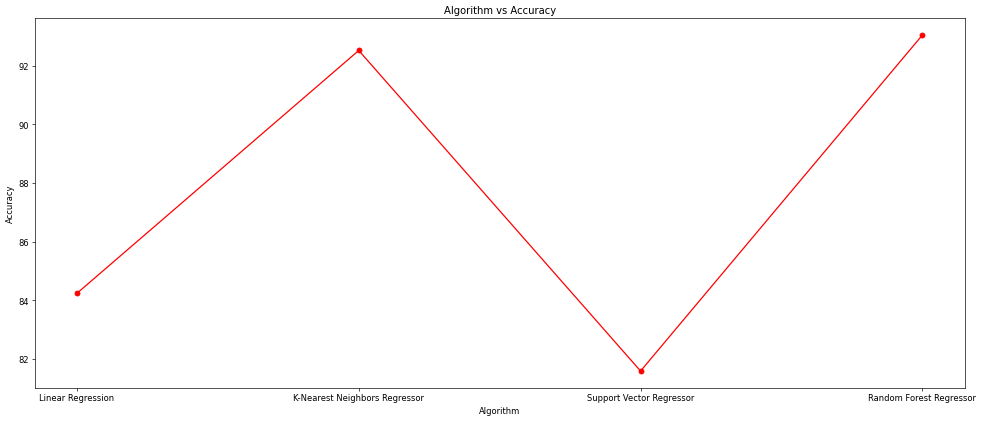

In [75]:
plt.figure(figsize=(20,8),dpi=60)
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(Accuracy.keys(),Accuracy.values(),marker='o',color='red')
plt.show()

# Final evaluation of our model
 Here we can see that K-Nearest Neighbors Regressor gives us the highest accuracy for our model which is 92.51 .
*   So we will use the K-Nearest Neighbors Regressor model for predicting the result in our model.






## Saving the model

In [76]:
import pickle

In [77]:
with open('Car_Price_Prediction_model.pkl','wb') as file:
    pickle.dump(knn_model,file)